In [1]:
from base import *
from base import Init

from functions import *

from task1 import task1
from task2 import task2
from task3 import task3
from task4 import task4
from task5 import task5

g_Tones, g_Midif, g_Fs, g_BigN = Init()
g_MyTones = [36, 44, 103]

functions_set_tones(g_Tones)

In [2]:
#task1(g_Tones, g_MyTones, g_Fs, g_BigN)

In [3]:
#task2(g_Fs, g_BigN)

In [4]:
#task3(g_Tones, 200, 10, g_Fs, g_BigN)

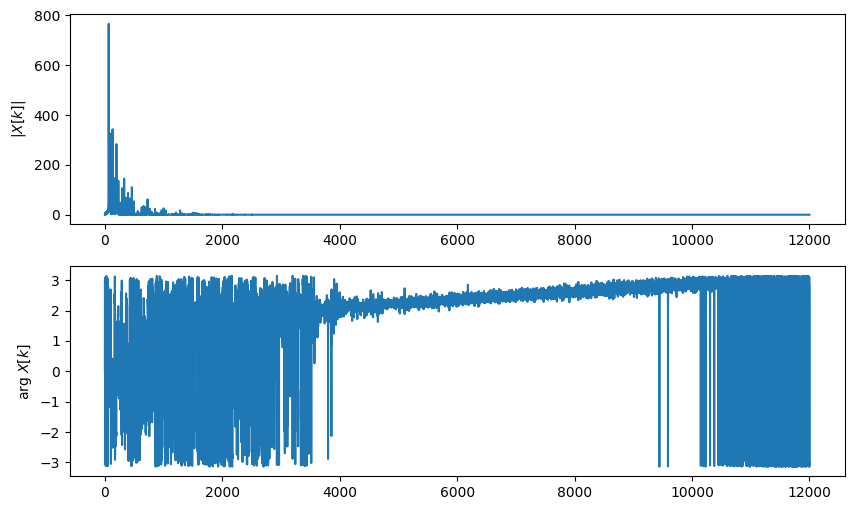

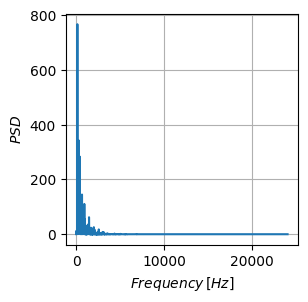

In [5]:
#task4(g_Tones, g_Midif, g_MyTones, 200, 10, g_Fs, g_BigN)

mag, phase = DFT(g_Tones[36])
#plot_tone_rfft_raw(36, g_Fs, g_BigN)

In [6]:
#task5(g_Tones, g_Midif, g_MyTones, 2, 200, 10, g_Fs, g_BigN)